In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Load ERA5 data 
va = xr.open_dataset('/scratch/lvillanu/data/pa-pdSIC-ext_va_mean_each_month.nc')
ua = xr.open_dataset('/scratch/lvillanu/data/pa-pdSIC-ext_ua_mean_each_month.nc')
hus = xr.open_dataset('/scratch/lvillanu/data/pa-pdSIC-ext_hus_mean_each_month.nc')

In [3]:
# Select relevant variables
v_wind = va['va'] 
u_wind = ua['ua'] 
specific_humidity = hus['hus'] 
pressure_levels = hus['plev']  # pressure levels

In [18]:
specific_humidity

<xarray.DataArray 'hus' (time: 12, plev: 19, lat: 96, lon: 144)> Size: 13MB
[3151872 values with dtype=float32]
Coordinates:
  * time     (time) object 96B 0335-01-01 00:00:00 ... 0334-12-01 00:00:00
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * plev     (plev) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Attributes:
    long_name:  specific_humidity
    units:      g kg-1

In [19]:
u_wind

<xarray.DataArray 'ua' (time: 12, plev: 19, lat: 96, lon: 144)> Size: 13MB
[3151872 values with dtype=float32]
Coordinates:
  * time     (time) object 96B 0335-01-01 00:00:00 ... 0334-12-01 00:00:00
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * plev     (plev) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Attributes:
    long_name:  eastward_wind
    units:      m s-1

In [5]:
# Filter for the Arctic region (north of 60°N)
arctic_specific_humidity = specific_humidity.sel(lat=slice(45, 90))
arctic_u_wind = u_wind.sel(lat=slice(45, 90))
arctic_v_wind = v_wind.sel(lat=slice(45, 90))

In [6]:
arctic_v_wind

<xarray.DataArray 'va' (time: 12, plev: 19, lat: 24, lon: 144)> Size: 3MB
[787968 values with dtype=float32]
Coordinates:
  * time     (time) object 96B 0335-01-01 00:00:00 ... 0334-12-01 00:00:00
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 192B 46.42 48.32 50.21 52.11 ... 86.21 88.11 90.0
  * plev     (plev) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Attributes:
    long_name:  northward_wind
    units:      m s-1

In [20]:
# Calculate moisture fluxes
moisture_flux_u = arctic_specific_humidity * arctic_u_wind/1000
moisture_flux_v = arctic_specific_humidity * arctic_v_wind/1000

In [21]:
moisture_flux_u

<xarray.DataArray (time: 12, plev: 19, lat: 24, lon: 144)> Size: 3MB
array([[[[ 3.11446524e-06,             nan,             nan, ...,
           4.98595255e-05,  4.40413787e-05,  2.70479450e-05],
         [ 1.17574446e-05,  1.29683042e-06,             nan, ...,
           4.77561443e-05,  3.85121202e-05,  2.47229636e-05],
         [ 2.05382457e-05,  1.35462369e-05,  5.65221671e-06, ...,
           4.35409784e-05,  3.61590501e-05,  2.50745525e-05],
         ...,
         [-1.20922402e-06, -1.27058559e-06, -1.32340801e-06, ...,
          -9.13179917e-07, -1.05511197e-06, -1.13567569e-06],
         [-1.15584533e-06, -1.16064689e-06, -1.16172862e-06, ...,
          -1.12550163e-06, -1.13990643e-06, -1.14996067e-06],
         [-9.51222489e-07, -9.38999563e-07, -9.24992264e-07, ...,
          -9.76956585e-07, -9.70222118e-07, -9.61640126e-07]],

        [[ 3.26404806e-05,  2.26335687e-05,  1.30368244e-05, ...,
           5.28488017e-05,  5.01107643e-05,  4.38946699e-05],
         [ 3.71278184e-05,  2.94047259e-05,  1.92862572e-05, ...,
           5.19236928e-05,  4.86481003e-05,  4.31978333e-05],
         [ 3.97504045e-05,  3.59800033e-05,  3.02077315e-05, ...,
           4.83833319e-05,  4.56329035e-05,  4.15843751e-05],
...
          -5.53887247e-08, -6.08054123e-08, -6.60544472e-08],
         [-9.72782104e-08, -1.02436807e-07, -1.07378646e-07, ...,
          -8.05805982e-08, -8.63409539e-08, -9.19096692e-08],
         [-1.21753246e-07, -1.27050185e-07, -1.32105271e-07, ...,
          -1.04514370e-07, -1.10474602e-07, -1.16224548e-07]],

        [[ 2.80876378e-07,  2.83085882e-07,  2.84600588e-07, ...,
           2.71232494e-07,  2.74833127e-07,  2.78179130e-07],
         [ 2.79313468e-07,  2.82453385e-07,  2.84922805e-07, ...,
           2.67317034e-07,  2.71568666e-07,  2.75601849e-07],
         [ 2.74529953e-07,  2.78529768e-07,  2.82062160e-07, ...,
           2.60796696e-07,  2.65557560e-07,  2.70094347e-07],
         ...,
         [-1.12194328e-07, -1.15167339e-07, -1.17871473e-07, ...,
          -1.01700891e-07, -1.05456536e-07, -1.08956492e-07],
         [-1.38229154e-07, -1.41453143e-07, -1.44387528e-07, ...,
          -1.26875335e-07, -1.30935632e-07, -1.34722072e-07],
         [-1.63995068e-07, -1.67332715e-07, -1.70351854e-07, ...,
          -1.52137403e-07, -1.56390172e-07, -1.60345238e-07]]]],
      dtype=float32)
Coordinates:
  * time     (time) object 96B 0335-01-01 00:00:00 ... 0334-12-01 00:00:00
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 192B 46.42 48.32 50.21 52.11 ... 86.21 88.11 90.0
  * plev     (plev) float32 76B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0

In [22]:
# Integrate over the vertical column
# Assuming pressure levels are in hPa and sorted from top to bottom
dp = np.gradient(pressure_levels) * 100  # convert hPa to Pa

In [23]:
# Reshape dp to match the dimensions of moisture_flux_u and moisture_flux_v
dp_reshaped = xr.DataArray(dp, dims=["plev"], coords={"plev": pressure_levels})

In [24]:
# Ensure dp_reshaped has the same dimensions as moisture_flux_u and moisture_flux_v
dp_reshaped_broadcasted = dp_reshaped.broadcast_like(moisture_flux_u)

In [25]:
total_moisture_flux_u = (moisture_flux_u * dp_reshaped_broadcasted).sum(dim='plev')
total_moisture_flux_v = (moisture_flux_v * dp_reshaped_broadcasted).sum(dim='plev')

In [26]:
total_moisture_flux_u = (moisture_flux_u * dp_reshaped_broadcasted).sum(dim='plev')
total_moisture_flux_v = (moisture_flux_v * dp_reshaped_broadcasted).sum(dim='plev')

In [36]:
total_moisture_flux_v

<xarray.DataArray (time: 12, lat: 24, lon: 144)> Size: 166kB
array([[[-3.78039569e-01, -1.72354534e-01, -7.92764425e-02, ...,
         -5.94910741e-01, -5.21541953e-01, -4.60177600e-01],
        [-5.17250359e-01, -4.33209687e-01, -2.65352547e-01, ...,
         -6.34116650e-01, -6.04228556e-01, -5.73500752e-01],
        [-6.34854853e-01, -5.61929762e-01, -4.66817856e-01, ...,
         -6.88464403e-01, -6.75746679e-01, -6.49820209e-01],
        ...,
        [-3.89965959e-02, -4.05734479e-02, -4.28889319e-02, ...,
         -3.36392485e-02, -3.59744690e-02, -3.80059630e-02],
        [-3.75313051e-02, -3.79764438e-02, -3.85930724e-02, ...,
         -3.25741358e-02, -3.41691449e-02, -3.60409804e-02],
        [-3.27692479e-02, -3.43891010e-02, -3.59435119e-02, ...,
         -2.75483765e-02, -2.93456316e-02, -3.10870372e-02]],

       [[-1.95037857e-01, -3.84339243e-02,  2.98022460e-02, ...,
         -2.60665596e-01, -2.27626383e-01, -2.09680513e-01],
        [-2.89077491e-01, -2.59520859e-01, -1.17469549e-01, ...,
         -3.09259415e-01, -3.04594368e-01, -3.09500426e-01],
        [-3.78058255e-01, -3.39459091e-01, -3.16640437e-01, ...,
         -3.76535475e-01, -3.72938842e-01, -3.67586821e-01],
...
         -5.32186851e-02, -5.42168282e-02, -5.49996272e-02],
        [-4.70999964e-02, -4.63857502e-02, -4.58544418e-02, ...,
         -4.59775664e-02, -4.63046655e-02, -4.67326455e-02],
        [-4.12328243e-02, -4.17963937e-02, -4.22804095e-02, ...,
         -3.90761606e-02, -3.98713946e-02, -4.05907296e-02]],

       [[-2.00217038e-01, -5.06563187e-02,  1.42412018e-02, ...,
         -1.90954968e-01, -1.74248874e-01, -1.61097556e-01],
        [-2.98663825e-01, -3.24432403e-01, -1.70597404e-01, ...,
         -2.59759039e-01, -2.68510908e-01, -3.05799156e-01],
        [-4.06913728e-01, -3.71519804e-01, -4.02743518e-01, ...,
         -3.45673710e-01, -3.59049797e-01, -3.80923152e-01],
        ...,
        [ 2.58926395e-03,  1.89492619e-03,  6.52688206e-04, ...,
          4.32563806e-03,  3.67004820e-03,  2.99112010e-03],
        [ 4.14022664e-03,  3.94672388e-03,  3.44758504e-03, ...,
          6.45775022e-03,  5.54750161e-03,  4.76860860e-03],
        [ 4.27046325e-03,  3.21489526e-03,  2.15321174e-03, ...,
          7.38042966e-03,  6.35521114e-03,  5.31789707e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) object 96B 0335-01-01 00:00:00 ... 0334-12-01 00:00:00
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 192B 46.42 48.32 50.21 52.11 ... 86.21 88.11 90.0

In [27]:
# Temporal averaging over 50 years (monthly means)
arctic_flux_u_mean = total_moisture_flux_u.groupby('time.month').mean(dim='time')
arctic_flux_v_mean = total_moisture_flux_v.groupby('time.month').mean(dim='time')

In [28]:
arctic_flux_u_mean

<xarray.DataArray (month: 12, lat: 24, lon: 144)> Size: 166kB
array([[[-1.36996508e+00, -1.16249347e+00, -9.61384177e-01, ...,
         -2.07576704e+00, -1.96303284e+00, -1.72409368e+00],
        [-1.47712171e+00, -1.27347922e+00, -1.09896934e+00, ...,
         -2.01410460e+00, -1.87364948e+00, -1.67776895e+00],
        [-1.53285384e+00, -1.41679966e+00, -1.27276146e+00, ...,
         -1.87451851e+00, -1.76010633e+00, -1.61275911e+00],
        ...,
        [ 1.98747311e-02,  1.93025749e-02,  1.86185874e-02, ...,
          2.03665625e-02,  2.05811653e-02,  2.02732775e-02],
        [ 3.22774351e-02,  3.08728162e-02,  2.93922182e-02, ...,
          3.62629518e-02,  3.50154489e-02,  3.36765200e-02],
        [ 3.78509685e-02,  3.63855697e-02,  3.48509513e-02, ...,
          4.18044701e-02,  4.05630134e-02,  3.92443649e-02]],

       [[-1.11327243e+00, -9.33931768e-01, -7.65659690e-01, ...,
         -1.63990843e+00, -1.57010567e+00, -1.38457775e+00],
        [-1.20373094e+00, -1.07104421e+00, -8.90339732e-01, ...,
         -1.65661383e+00, -1.53329098e+00, -1.36187673e+00],
        [-1.27331161e+00, -1.17498469e+00, -1.07787824e+00, ...,
         -1.58389425e+00, -1.47030878e+00, -1.33805490e+00],
...
          6.31711097e-04, -5.86205395e-04, -1.95117155e-03],
        [ 7.57640880e-03,  5.45908511e-03,  3.34877940e-03, ...,
          1.39658088e-02,  1.18820099e-02,  9.73853841e-03],
        [ 1.38199655e-02,  1.20082079e-02,  1.01736169e-02, ...,
          1.90836638e-02,  1.73610244e-02,  1.56053426e-02]],

       [[-1.22186446e+00, -1.10048592e+00, -9.11609232e-01, ...,
         -1.78025436e+00, -1.73319292e+00, -1.49456441e+00],
        [-1.38787079e+00, -1.22297585e+00, -1.05949616e+00, ...,
         -1.84526718e+00, -1.71851611e+00, -1.55285883e+00],
        [-1.47602069e+00, -1.36870039e+00, -1.28274465e+00, ...,
         -1.78506303e+00, -1.67474961e+00, -1.54657555e+00],
        ...,
        [-1.17674340e-02, -1.10794744e-02, -1.04319239e-02, ...,
         -1.48020210e-02, -1.38274645e-02, -1.29962480e-02],
        [ 1.01863230e-02,  1.05413459e-02,  1.08603807e-02, ...,
          9.10210982e-03,  9.49238054e-03,  9.84891504e-03],
        [ 2.41063554e-02,  2.42697001e-02,  2.43868716e-02, ...,
          2.33426839e-02,  2.36423984e-02,  2.38971151e-02]]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 192B 46.42 48.32 50.21 52.11 ... 86.21 88.11 90.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [29]:
# Combine the fluxes to get the total moisture transport
total_moisture_flux = np.sqrt(total_moisture_flux_u**2 + total_moisture_flux_v**2)

# Temporal averaging over 50 years (monthly means)
arctic_flux_mean = total_moisture_flux.groupby('time.month').mean(dim='time')

In [39]:
arctic_flux_mean

<xarray.DataArray (month: 12, lat: 24, lon: 144)> Size: 166kB
array([[[1.4211679 , 1.1752009 , 0.96464723, ..., 2.159335  ,
         2.0311337 , 1.7844502 ],
        [1.5650675 , 1.3451468 , 1.130551  , ..., 2.1115685 ,
         1.9686682 , 1.7730798 ],
        [1.6591207 , 1.5241674 , 1.3556699 , ..., 1.9969484 ,
         1.8853668 , 1.7387519 ],
        ...,
        [0.04376916, 0.04493099, 0.04675588, ..., 0.03932424,
         0.04144571, 0.04307504],
        [0.04950184, 0.04894222, 0.04851111, ..., 0.04874501,
         0.04892455, 0.04932606],
        [0.05006515, 0.05006516, 0.0500652 , ..., 0.05006523,
         0.0500652 , 0.0500652 ]],

       [[1.1302279 , 0.9347223 , 0.76623946, ..., 1.6604958 ,
         1.58652   , 1.4003648 ],
        [1.2379556 , 1.1020375 , 0.8980556 , ..., 1.6852331 ,
         1.5632527 , 1.3966025 ],
        [1.3282509 , 1.2230378 , 1.1234245 , ..., 1.6280357 ,
         1.516869  , 1.3876278 ],
...
        [0.0547988 , 0.05499275, 0.05555394, ..., 0.05322244,
         0.05422   , 0.05503423],
        [0.04770547, 0.04670588, 0.04597656, ..., 0.04805185,
         0.04780485, 0.04773656],
        [0.04348721, 0.04348719, 0.04348719, ..., 0.04348715,
         0.04348716, 0.04348717]],

       [[1.2381598 , 1.1016512 , 0.91172045, ..., 1.7904662 ,
         1.74193   , 1.5032215 ],
        [1.4196427 , 1.2652771 , 1.0731429 , ..., 1.8634607 ,
         1.7393664 , 1.5826824 ],
        [1.5310832 , 1.418227  , 1.3444836 , ..., 1.8182245 ,
         1.7128056 , 1.5927958 ],
        ...,
        [0.01204893, 0.01124035, 0.01045232, ..., 0.01542112,
         0.01430622, 0.01333601],
        [0.01099557, 0.01125596, 0.01139446, ..., 0.01116024,
         0.01099455, 0.01094261],
        [0.02448169, 0.0244817 , 0.02448174, ..., 0.02448166,
         0.02448166, 0.02448167]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 192B 46.42 48.32 50.21 52.11 ... 86.21 88.11 90.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

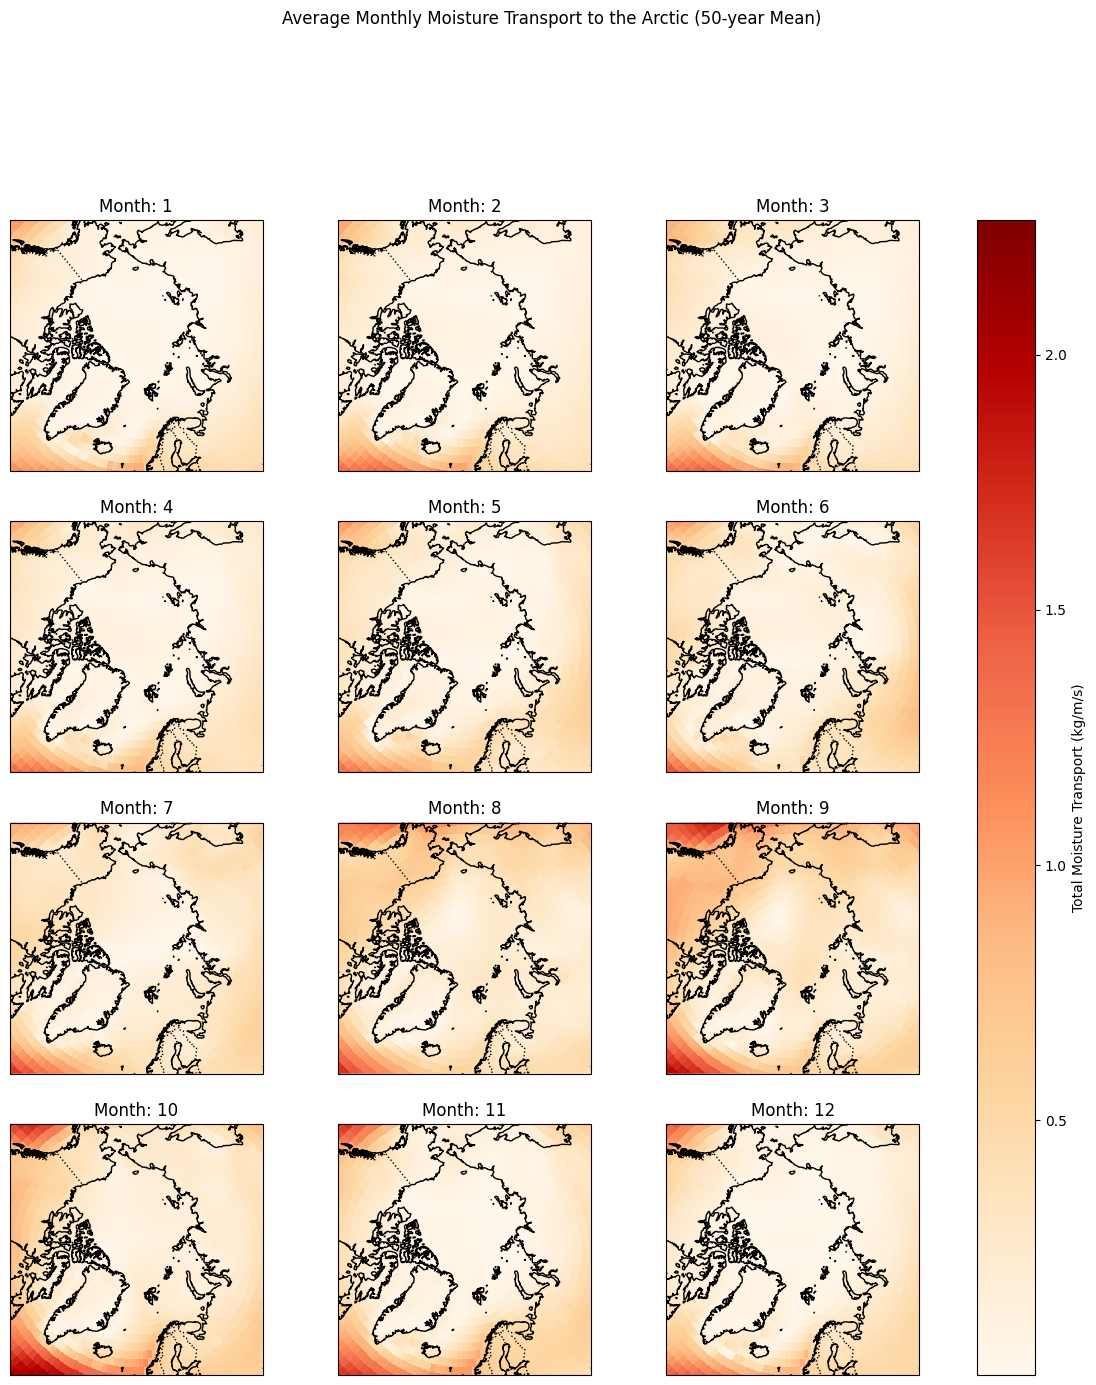

In [31]:
# Plot the results using Cartopy
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = arctic_flux_mean.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='OrRd')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Total Moisture Transport (kg/m/s)')

fig.suptitle('Average Monthly Moisture Transport to the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

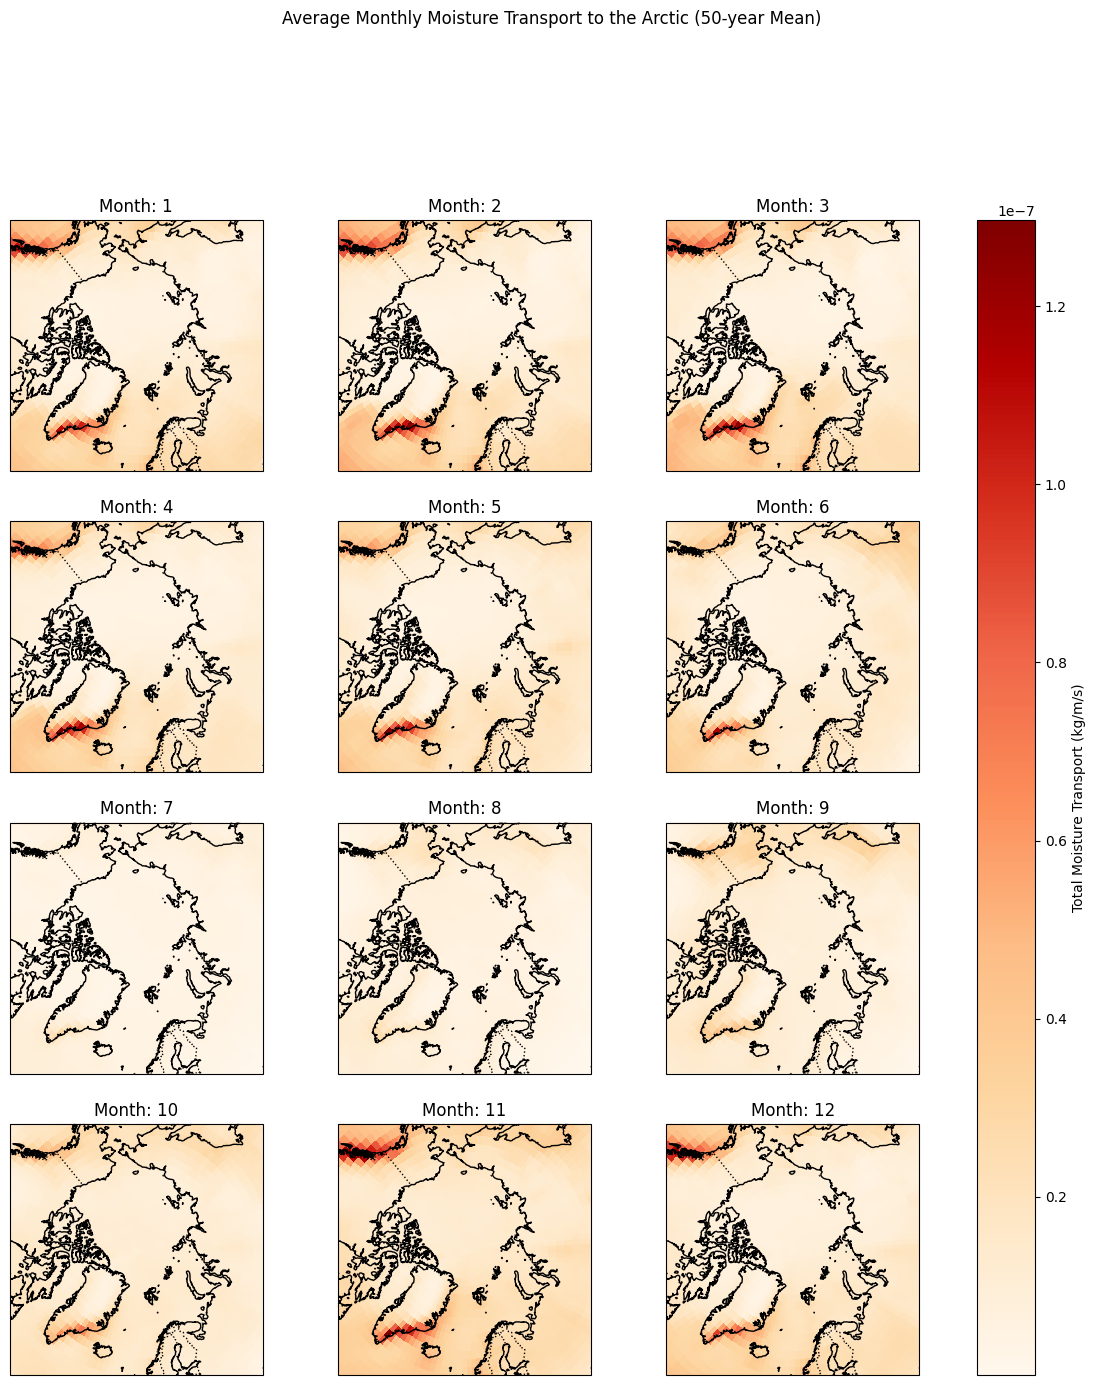

In [56]:
pr1 = xr.open_dataset('/scratch/lvillanu/data/pa-pdSIC-ext_pr_mean_each_month.nc')

pr1_ = pr1['pr'].groupby('time.month').mean(dim='time')
# Plot the results using Cartopy
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = pr_.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='OrRd')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Total Moisture Transport (kg/m/s)')

fig.suptitle('Average Monthly Moisture Transport to the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

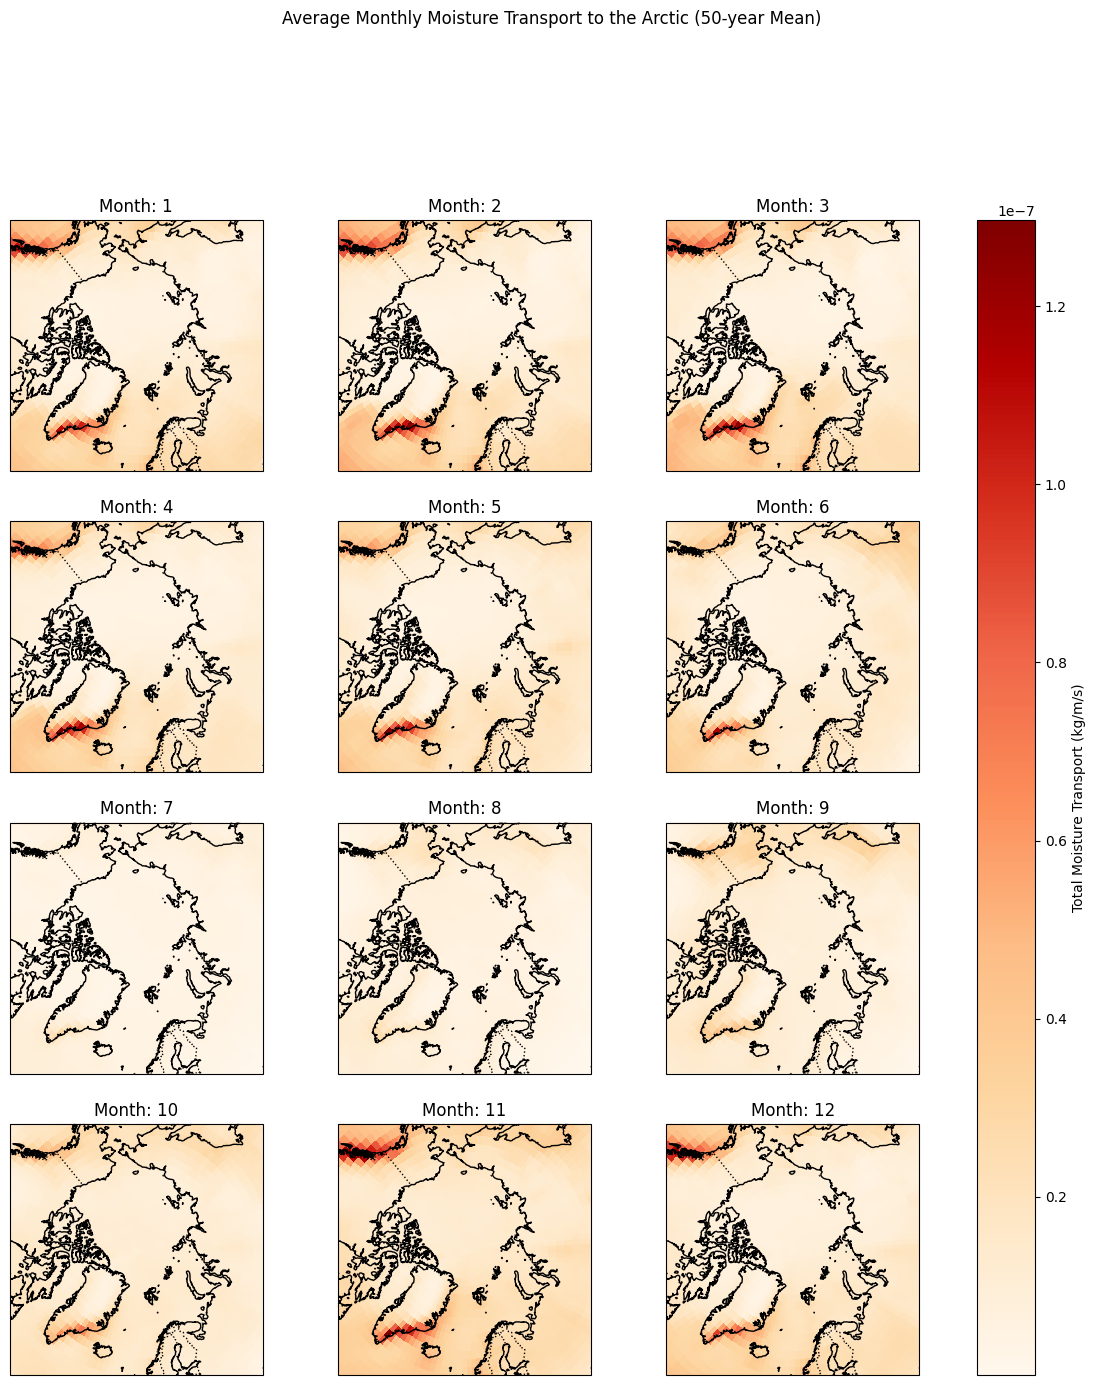

In [57]:
pr2 = xr.open_dataset('/scratch/lvillanu/data/pa-futArcSIC-ext_pr_mean_each_month.nc')

pr2_ = pr2['pr'].groupby('time.month').mean(dim='time')
# Plot the results using Cartopy
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = pr_.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='OrRd')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Total Moisture Transport (kg/m/s)')

fig.suptitle('Average Monthly Moisture Transport to the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

In [62]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter = 0)

In [66]:
pr1__ = pr1_*  (8.64e7)
pr2__ = pr2_*  (8.64e7)

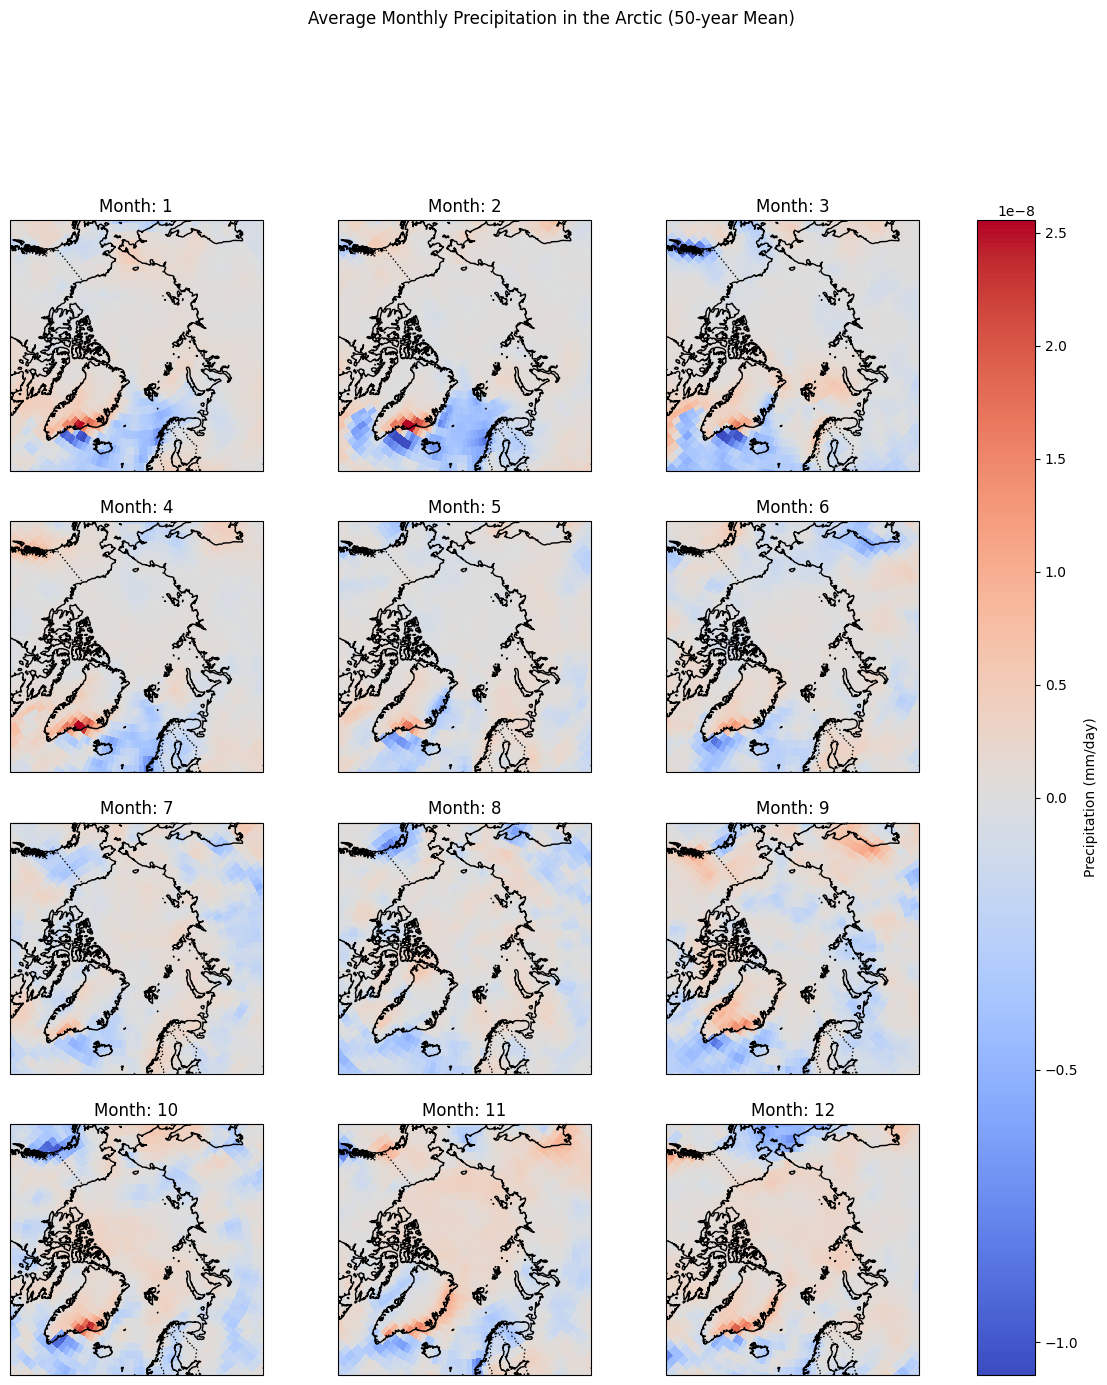

In [68]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = (pr2_.sel(month=month) - pr1_.sel(month=month))
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='coolwarm', norm = norm)
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Precipitation (mm/day)')

fig.suptitle('Average Monthly Precipitation in the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

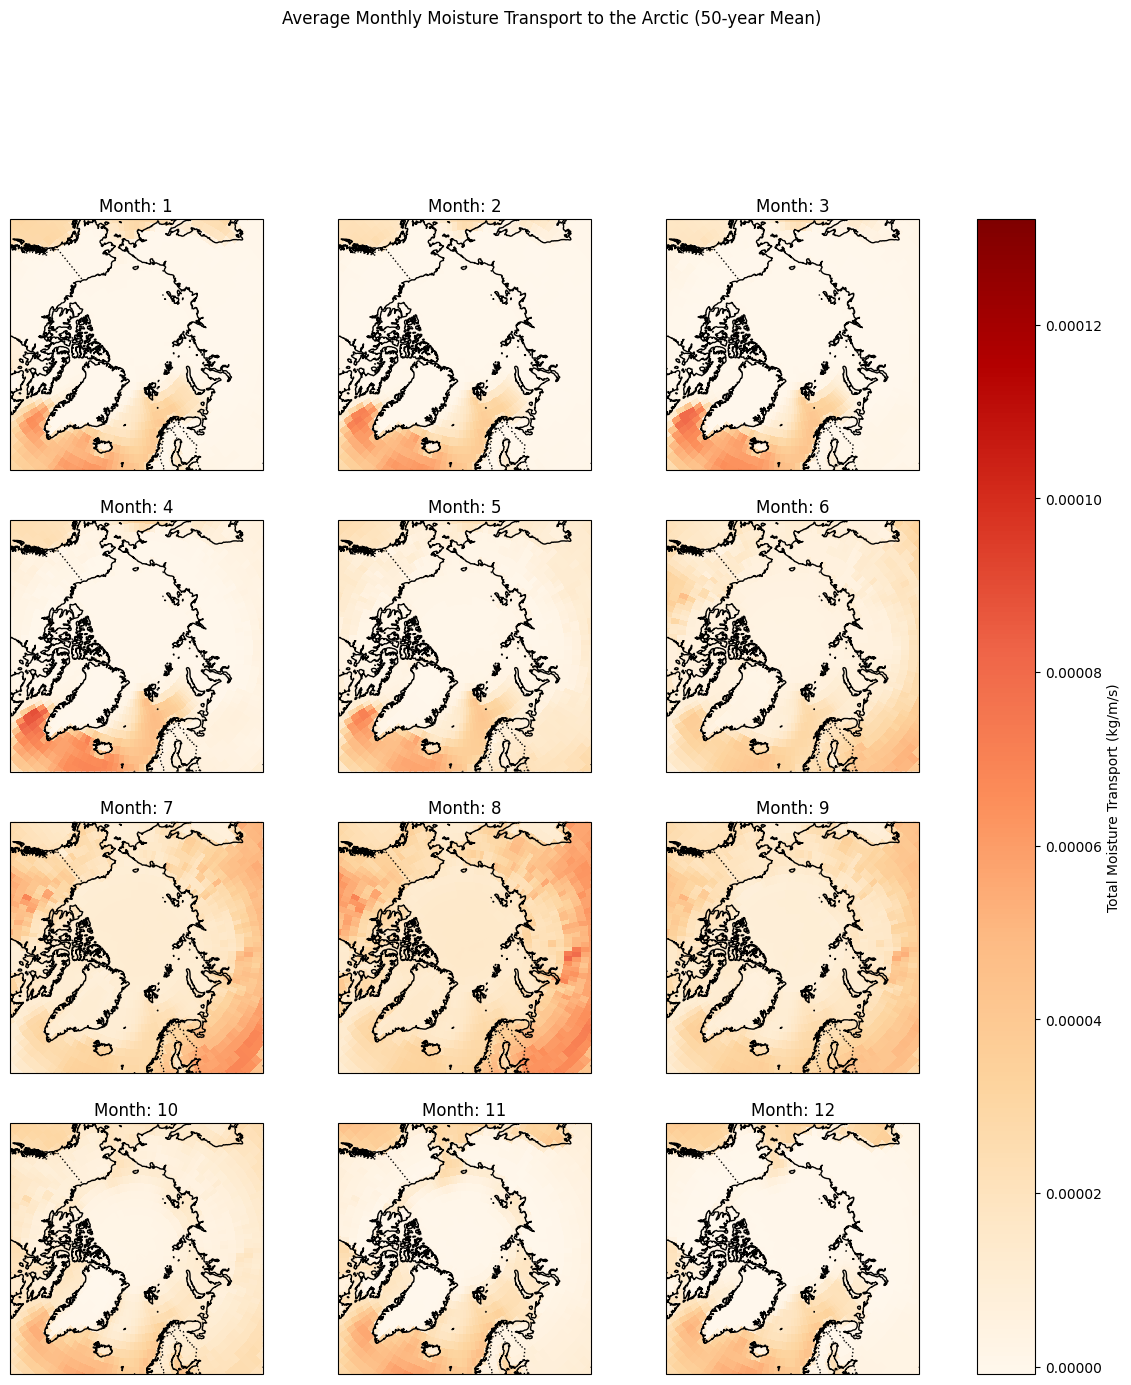

In [69]:
qflx1 = xr.open_dataset('/scratch/lvillanu/data/pa-pdSIC-ext_qflx_mean_each_month.nc')

qflx1_ = qflx1['qflx'].groupby('time.month').mean(dim='time')
# Plot the results using Cartopy
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = qflx1_.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='OrRd')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Total Moisture Transport (kg/m/s)')

fig.suptitle('Average Monthly Moisture Transport to the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

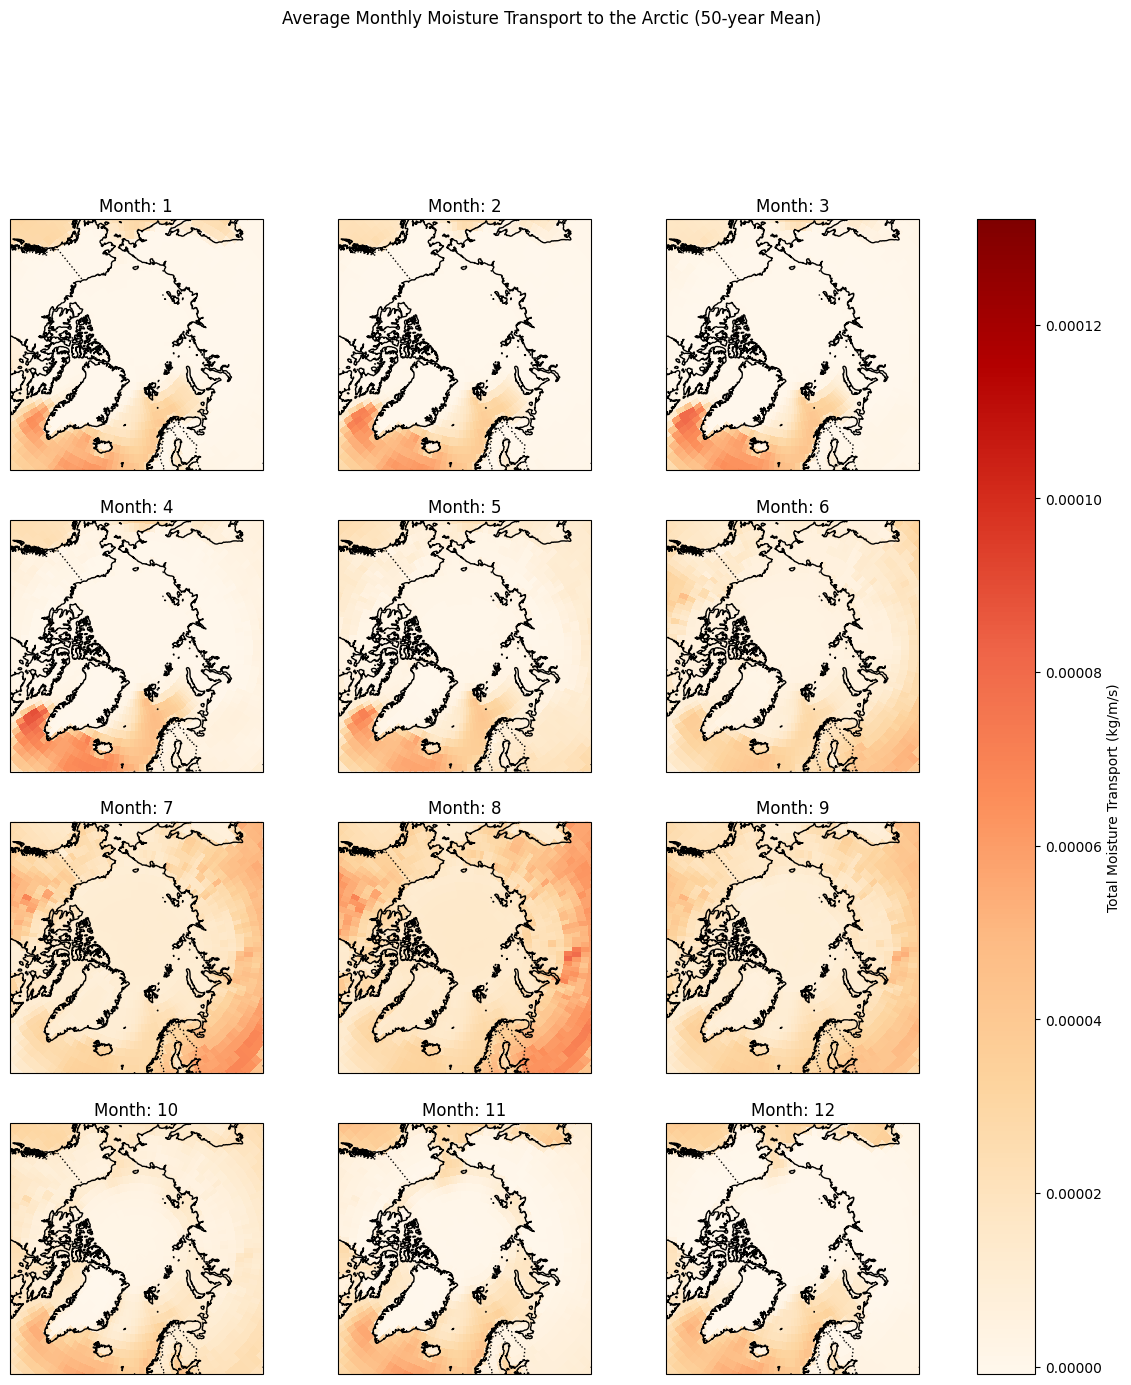

In [70]:
qflx2 = xr.open_dataset('/scratch/lvillanu/data/pa-futArcSIC-ext_qflx_mean_each_month.nc')

qflx2_ = qflx2['qflx'].groupby('time.month').mean(dim='time')
# Plot the results using Cartopy
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = qflx1_.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='OrRd')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Total Moisture Transport (kg/m/s)')

fig.suptitle('Average Monthly Moisture Transport to the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()

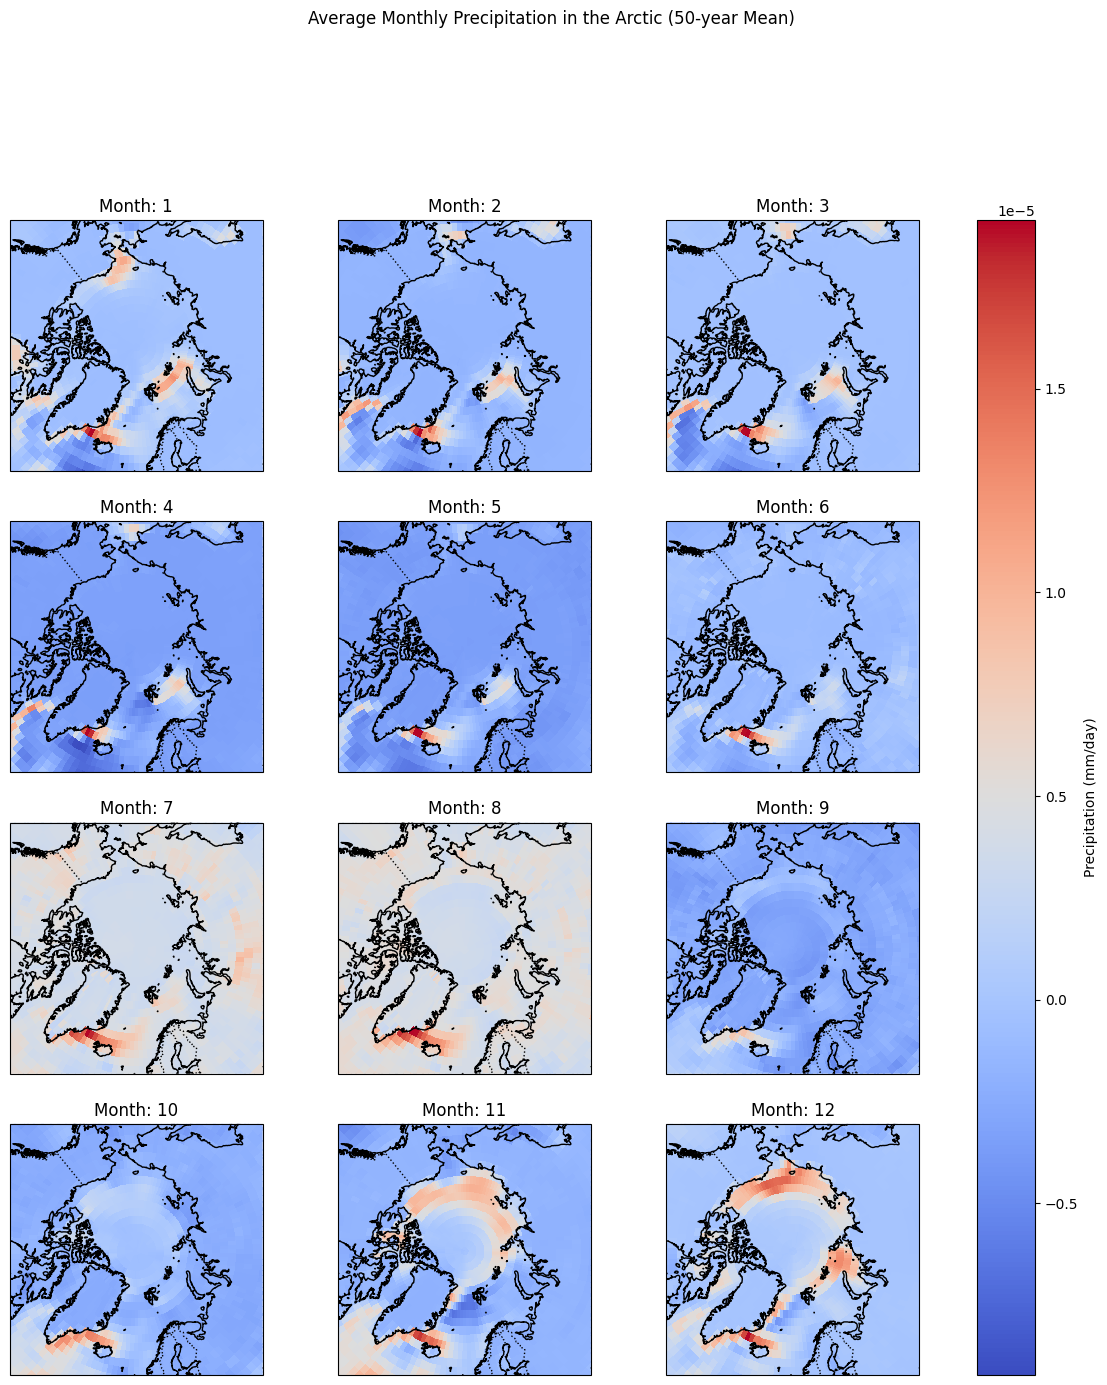

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    #ax.gridlines(draw_labels=True)
    
    # Plot with color
    flux_data = qflx2_.sel(month=month) - qflx1_.sel(month=month)
    c = ax.pcolormesh(flux_data.lon, flux_data.lat, flux_data, transform=ccrs.PlateCarree(), cmap='coolwarm')
    
    ax.set_title(f'Month: {month}')

# Add colorbar
cbar = fig.colorbar(c, ax=axes)
cbar.set_label('Precipitation (mm/day)')

fig.suptitle('Average Monthly Precipitation in the Arctic (50-year Mean)', y=1.02)
#plt.tight_layout()
plt.show()